# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [4]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2), dtype=int)                         # 2 radky a sloupce navic pro nulovy okraj, zamezi problmeum s indexovanim
    numbers = np.arange(1, n**2 + 1)[::-1]                          # 1 az n**2, serazeno sestupne
    
    for i in range(0, n//2 + 1):  
        A[n - i, 1 + i:n + 1 - i] = numbers[:n - 2*i][::-1]             # dolni radek - rozhodl jsem se plnit matici smerem dovnitr
        numbers = numbers[(n - 2*i):]
        A[1 + i:n - i, 1 + i] = numbers[:n - 1 - 2*i][::-1]        # levy sloupec
        numbers = numbers[(n-1 - 2*i):]
        A[1 + i, i + 2:n + 1 - i] = numbers[:n - 1 - 2*i]         # horni radek
        numbers = numbers[(n - 1 - 2*i):]
        A[2 + i:n - i, n - i] = numbers[:n - 2 - 2*i]             # pravy sloupec
        numbers = numbers[(n - 2 - 2*i):]
    i += 1
    return A[1:-1, 1:-1]                                           # bez nuloveho okraje

print(integer_spiral_numpy(7))  

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


In [5]:
print("Base function n = 101:")
%timeit integer_spiral(101)
print("Custom function = 101:")
%timeit integer_spiral_numpy(101)


Base function n = 101:


11.6 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom function = 101:
227 µs ± 75.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
print("Base function n = 1001:")
%timeit integer_spiral(1001)
print("Custom function n = 1001:")
%timeit integer_spiral_numpy(1001)

Base function n = 1001:
866 ms ± 96.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Custom function n = 1001:
9.26 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
#print("Base function n = 10001:")           
#%timeit integer_spiral(10001)
#print("Custom function n = 10001:")
#%timeit integer_spiral_numpy(10001)

# trvalo to prilis dlouho, ale numpy bude opet rychlejsi

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
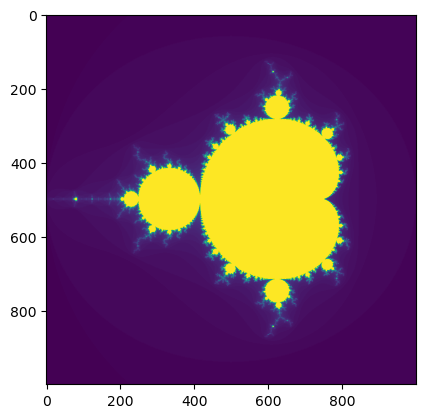

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [8]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x = np.linspace(x_min, x_max, n)                    #pole hodnot x - realna cast
    y = np.linspace(y_min, y_max, n)                    #pole hodnot y - imaginarni cast
    X, Y = np.meshgrid(x, y)                            #matice souradnic x a y
    C = X + 1j * Y                                      #algebraicky zapis komplexnich cisel
    
    Z = np.zeros((n,n), dtype=complex)                  #matice komplexnich cisel
    divergence_matrix = np.zeros((n, n), dtype=int)     #matice pro pocet iteraci
    
    for i in range(k):
        Z = Z**2 + C
        divergence_matrix[np.abs(Z) > 2 & (divergence_matrix == 0)] = i          #kontrola divergence vsech bodu, kdzy divergoval a neni jeste zapsan, zapise se na jeho misto v pomocne matici hodnpota i
    
    return divergence_matrix

/tmp/ipykernel_2573/2428220372.py:11: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
/tmp/ipykernel_2573/2428220372.py:11: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C
/tmp/ipykernel_2573/2428220372.py:12: RuntimeWarning: overflow encountered in absolute
  divergence_matrix[np.abs(Z) > 2 & (divergence_matrix == 0)] = i          #kontrola divergence vsech bodu, kdzy divergoval a neni jeste zapsan, zapise se na jeho misto v pomocne matici hodnpota i


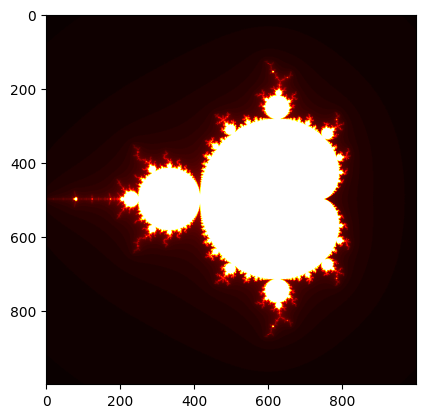

In [9]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix, cmap='hot')           #barva z netu

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 